In [ ]:
# データを可視化分析_※AVILEN講座参考
# 特徴量の可視化、決定木、ランダムフォレスト、ロジスティック回帰、SVM、k近傍法を使用

In [ ]:
# Feature Visualization
# 可視化用のライブラリをインポート
#データ処理
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
#可視化
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# データインポート
titanic_df = pd.read_csv("train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# データの中身を確認
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='Sex', ylabel='count'>

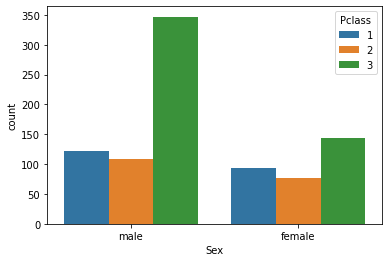

In [ ]:
# countplot:Titanicnの乗客クラスを性別ごとにプロットする
#Sex:Pclass
sns.countplot(x="Sex",hue="Pclass",data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

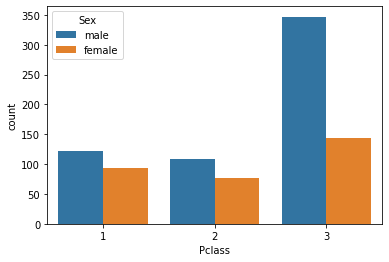

In [ ]:
#Pclass:Sex
sns.countplot('Pclass',hue="Sex",data=titanic_df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

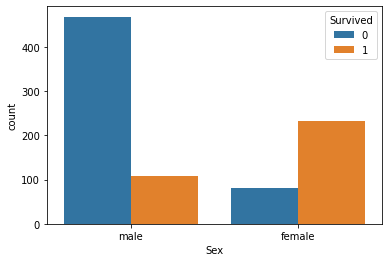

In [ ]:
#Sex:Survived
sns.countplot(x="Sex",hue="Survived",data=titanic_df)

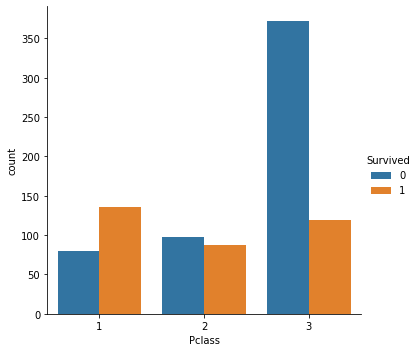

In [ ]:
#Pclass:survived
sns.catplot(x="Pclass",hue="Survived",data=titanic_df,kind="count")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

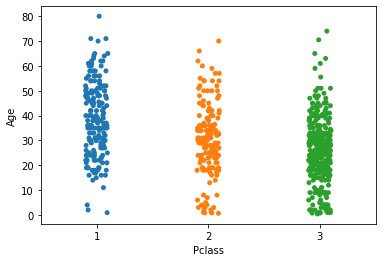

In [ ]:
#stripplot:Titanicの乗客の年齢をクラスごとにプロットする
sns.stripplot(x="Pclass",y="Age",data=titanic_df)

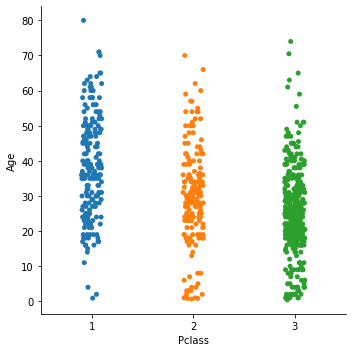

In [ ]:
sns.catplot(x="Pclass",y="Age",data=titanic_df,kind="strip")

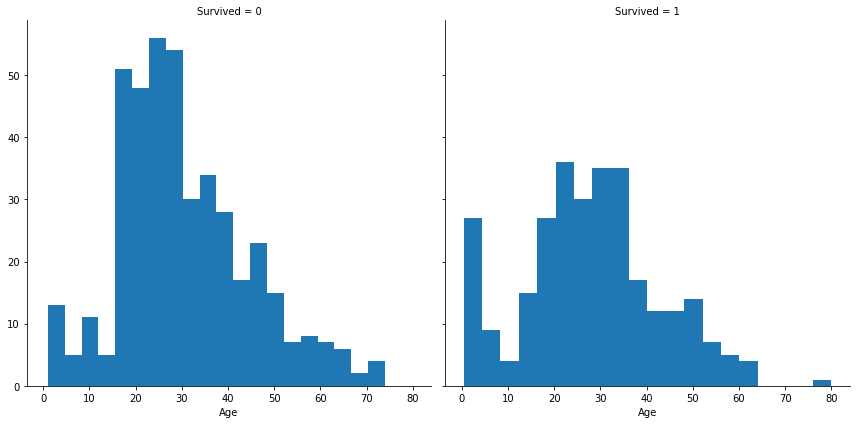

In [ ]:
#FacetGrid:Titanicの乗客の年齢分布を生存＆死亡ごとにプロットする
#FacetGridグラフ:Age
a=sns.FacetGrid(titanic_df,col="Survived",height=6)
a.map(plt.hist,'Age',bins=20)

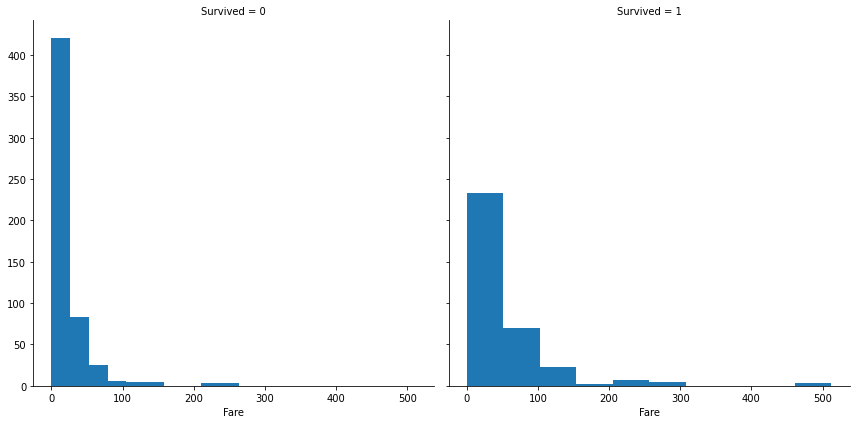

In [ ]:
b=sns.FacetGrid(titanic_df,col='Survived',height=6)
b.map(plt.hist,'Fare',bins=10)

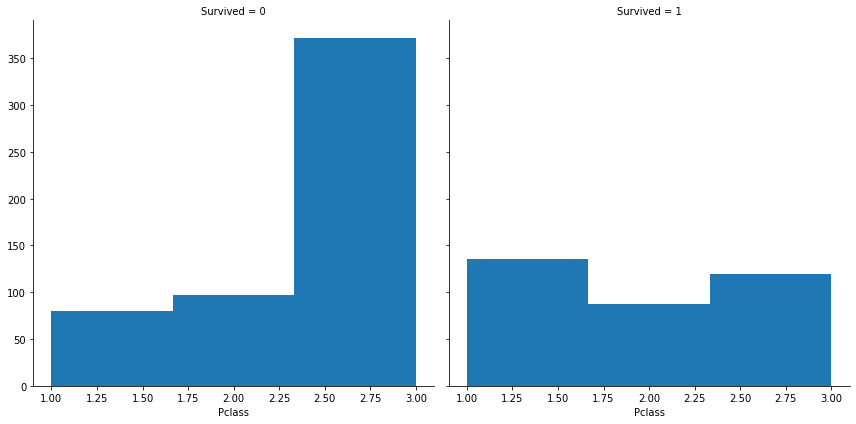

In [ ]:
#FacetGridグラフ:Pclass
#x軸の範囲が少ない時、FacetGridではなく、countplotを使う
b=sns.FacetGrid(titanic_df,col="Survived",height=6)
b.map(plt.hist,'Pclass',bins=3)

In [ ]:
#Heatmap:特徴量の相関関係をプロットする
#Passengerldのコラムはいらない
titanic_df02=titanic_df.drop(["PassengerId"],axis=1)

<AxesSubplot:>

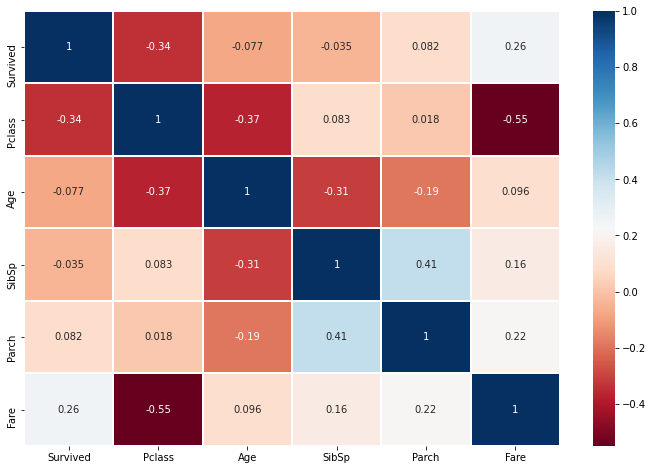

In [ ]:
#相関
colormap=plt.cm.RdBu
plt.figure(figsize=(12,8))
sns.heatmap(titanic_df02.corr(),linewidths=1,vmax=1.0,cmap=colormap,linecolor='white',annot=True)

In [ ]:
#matplotlib
Survived_Pclass=titanic_df['Pclass'].groupby(titanic_df['Survived'])

In [ ]:
Survived_Pclass.value_counts().unstack()

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


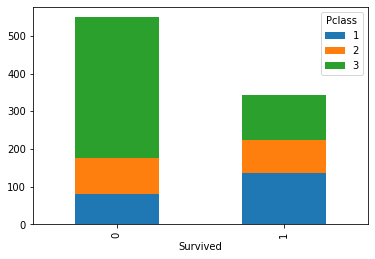

In [ ]:
Survived_Pclass.value_counts().unstack().plot(kind='bar',stacked=True)
plt.show()

In [ ]:
total_survived=titanic_df['Survived'].sum()
total_no_survived=891-total_survived

Text(0.5, 1.0, 'Survived rate')

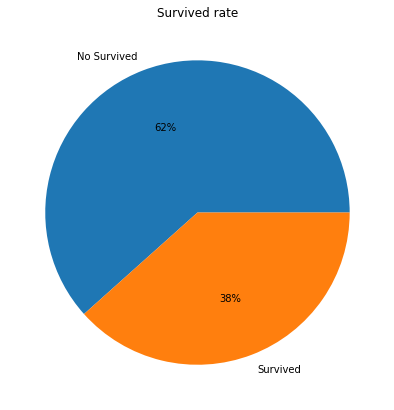

In [ ]:
plt.figure(figsize=(7,7))
plt.pie([total_no_survived,total_survived],labels=['No Survived','Survived'],autopct='%1.0f%%')
plt.title('Survived rate')

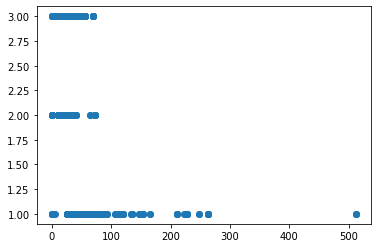

In [ ]:
plt.scatter(titanic_df.Fare,titanic_df.Pclass)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
train=pd.read_csv("titanic_modified.csv")

In [ ]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,AgeGroup,Title,FareBand
0,0,3,0,1,0,4,1,1
1,1,1,1,1,0,6,3,4
2,1,3,1,0,0,5,2,2
3,1,1,1,1,0,5,3,4
4,0,3,0,0,0,5,1,2


In [ ]:
# 分類時のデータを用意する（ラベルを外す）
predictors=train.drop(['Survived'],axis=1)

#ラベルを指定する
target=train['Survived']

#訓練データを８０％、テストデータを２０％に分割する
x_train,x_val,y_train,y_val=train_test_split(predictors,target,test_size=0.2,random_state=0)

In [ ]:
#決定木
decisiontree=DecisionTreeClassifier()
#訓練
decisiontree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=decisiontree.predict(x_val)

In [ ]:
acc_decisiontree=round(accuracy_score(y_pred,y_val)*100,2)
print(acc_decisiontree)

81.56


In [ ]:
#ランダムフォレスト Random Forest
randomforest=RandomForestClassifier()
randomforest.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=randomforest.predict(x_val)

In [ ]:
acc_randomforest=round(accuracy_score(y_pred,y_val)*100,2)
print(acc_randomforest)

83.8


In [ ]:
#ロジスティック回帰　Logistic Regression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=logreg.predict(x_val)
acc_logreg=round(accuracy_score(y_pred,y_val)*100,2)
print(acc_logreg)

77.09


In [ ]:
#サポートベクタマシン SupportVectorMachine
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [ ]:
y_pred=svc.predict(x_val)
acc_svc=round(accuracy_score(y_pred,y_val)*100,2)
print(acc_svc)

82.68


In [ ]:
#k-nearest Neighbor Algorithm(k-NN)
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=knn.predict(x_val)

In [ ]:
acc_knn=round(accuracy_score(y_pred,y_val)*100,2)
print('Score is', acc_knn)

Score is 83.8


In [ ]:
#Accuracy Comparation
#予測結果をいとつのデータフレームにまとめる
models=pd.DataFrame({
    'Model':['Logistic Regression','Random Forest','Decision Tree','SVM','kNN'],
    'Score':[acc_logreg,acc_randomforest,acc_decisiontree,acc_svc,acc_knn]})

In [ ]:
models

,Model,Score
0,Logistic Regression,77.09
1,Random Forest,83.80
2,Decision Tree,81.56
3,SVM,82.68
4,kNN,83.80


In [ ]:
models.sort_values(by='Score',ascending=False)

,Model,Score
1,Random Forest,83.80
4,kNN,83.80
3,SVM,82.68
2,Decision Tree,81.56
0,Logistic Regression,77.09


<AxesSubplot:xlabel='SibSp', ylabel='count'>

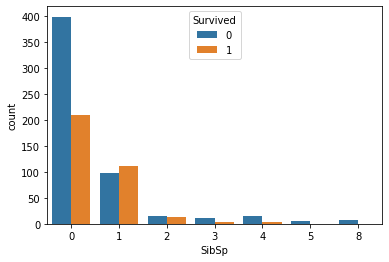

In [ ]:
#1.countplot - SibSp:Survived
sns.countplot(x="SibSp",hue="Survived",data=titanic_df)

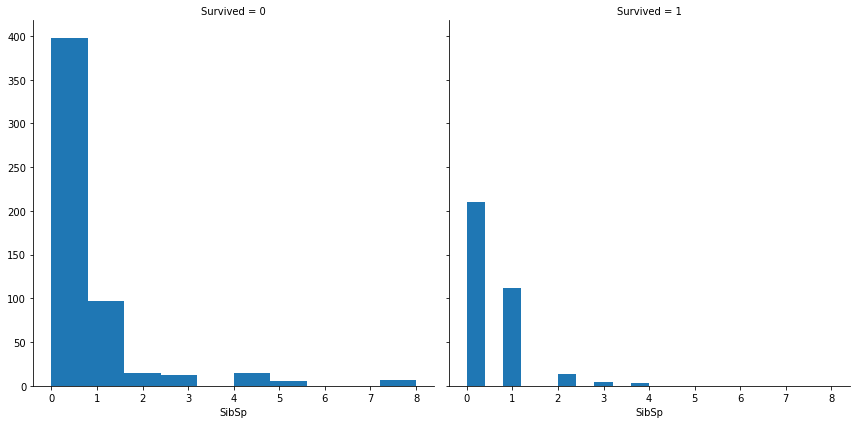

In [ ]:
# わかりにくい 1.FacetGrid - SibSp:Survived
c=sns.FacetGrid(titanic_df,col='Survived',height=6)
c.map(plt.hist,'SibSp',bins=10)

<AxesSubplot:xlabel='Parch', ylabel='count'>

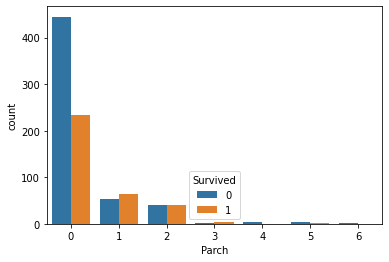

In [ ]:
#2.Parch
sns.countplot(x="Parch",hue="Survived",data=titanic_df)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

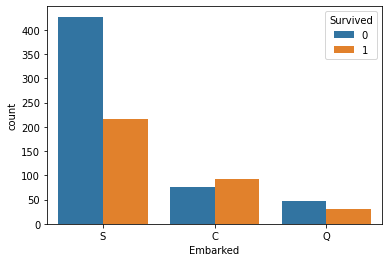

In [ ]:
#3.Embarked
sns.countplot(x="Embarked",hue="Survived",data=titanic_df)

In [ ]:
dau_201308=pd.read_csv('dau_201308.csv')

In [ ]:
print(type(dau_201308))
print(dau_201308.shape)
dau_201308.head()

<class 'pandas.core.frame.DataFrame'>
(94185, 5)


,log_year,log_month,log_date,app_name,user_id
0,2013,2013-08,2013-08-01,game-01,33754
1,2013,2013-08,2013-08-01,game-01,28598
2,2013,2013-08,2013-08-01,game-01,30306
3,2013,2013-08,2013-08-01,game-01,117
4,2013,2013-08,2013-08-01,game-01,6605


In [ ]:
dau_201308.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94185 entries, 0 to 94184
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   log_year   94185 non-null  int64 
 1   log_month  94185 non-null  object
 2   log_date   94185 non-null  object
 3   app_name   94185 non-null  object
 4   user_id    94185 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 3.6+ MB


In [ ]:
dau_201309=pd.read_csv('dau_201309.csv')
print(type(dau_201309))
print(dau_201309.shape)
dau_201309.head()

<class 'pandas.core.frame.DataFrame'>
(76175, 5)


,log_year,log_month,log_date,app_name,user_id
0,2013,2013-09,2013-09-01,game-01,40293
1,2013,2013-09,2013-09-01,game-01,28598
2,2013,2013-09,2013-09-01,game-01,30306
3,2013,2013-09,2013-09-01,game-01,24956
4,2013,2013-09,2013-09-01,game-01,117


In [ ]:
user_info=pd.read_csv('user_info.csv')
print(type(user_info))
print(user_info.shape)
user_info.head()

<class 'pandas.core.frame.DataFrame'>
(49526, 6)


,install_date,app_name,user_id,gender,generation,device_type
0,2013-04-15,game-01,1,M,40,iOS
1,2013-04-15,game-01,2,M,10,Android
2,2013-04-15,game-01,3,F,40,iOS
3,2013-04-15,game-01,4,M,10,Android
4,2013-04-15,game-01,5,M,40,iOS


In [ ]:
#8月のアクセス数
dau_201308.groupby('log_month').count()

,log_year,log_date,app_name,user_id
log_month,,,,
2013-08,94185,94185,94185,94185


In [ ]:
dau_201309.groupby('log_month').count()

,log_year,log_date,app_name,user_id
log_month,,,,
2013-09,76175,76175,76175,76175


In [ ]:
#8月のapp_nameの種類を確認
dau_201308.groupby('app_name').count()

,log_year,log_month,log_date,user_id
app_name,,,,
game-01,94185,94185,94185,94185


In [ ]:
#9月のapp_nameの種類を確認
dau_201309.groupby('app_name').count()

,log_year,log_month,log_date,user_id
app_name,,,,
game-01,76175,76175,76175,76175


In [ ]:
#user_infoのapp_nameの種類を確認
user_info.groupby('app_name').count()

,install_date,user_id,gender,generation,device_type
app_name,,,,,
game-01,49526,49526,49526,49526,49526


In [ ]:
#８月と９月のデータを縦結合
dau=pd.concat([dau_201308,dau_201309],axis=0)
print(type(dau))
print(dau.shape)
dau.head()

<class 'pandas.core.frame.DataFrame'>
(170360, 5)


,log_year,log_month,log_date,app_name,user_id
0,2013,2013-08,2013-08-01,game-01,33754
1,2013,2013-08,2013-08-01,game-01,28598
2,2013,2013-08,2013-08-01,game-01,30306
3,2013,2013-08,2013-08-01,game-01,117
4,2013,2013-08,2013-08-01,game-01,6605


In [ ]:
#user_infoのデータコラムをleft結合
df3_1=pd.merge(dau,user_info,on=['user_id'],how='left')
print(type(df3_1))
print(df3_1.shape)
df3_1.head()

<class 'pandas.core.frame.DataFrame'>
(170360, 10)


,log_year,log_month,log_date,app_name_x,user_id,install_date,app_name_y,gender,generation,device_type
0,2013,2013-08,2013-08-01,game-01,33754,2013-08-01,game-01,M,20,iOS
1,2013,2013-08,2013-08-01,game-01,28598,2013-07-16,game-01,M,50,iOS
2,2013,2013-08,2013-08-01,game-01,30306,2013-07-20,game-01,F,30,iOS
3,2013,2013-08,2013-08-01,game-01,117,2013-04-17,game-01,F,20,iOS
4,2013,2013-08,2013-08-01,game-01,6605,2013-05-02,game-01,M,20,iOS


<AxesSubplot:xlabel='log_month'>

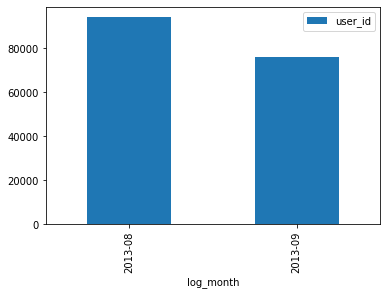

In [ ]:
#8,9月user数比較
df3_1[['log_month','user_id']].groupby('log_month').count().plot(kind='bar')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='log_date'>

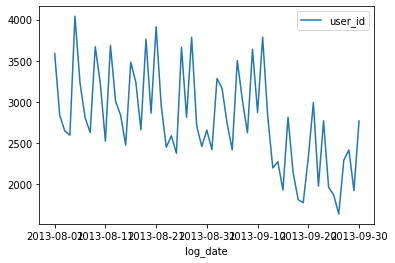

In [ ]:
df3_1[['log_date','user_id']].groupby('log_date').count().plot(kind='line')

In [ ]:
df3_1[['log_month','user_id','gender']].groupby(['log_month','gender'],as_index=False).count()

,log_month,gender,user_id
0,2013-08,F,47343
1,2013-08,M,46842
2,2013-09,F,38027
3,2013-09,M,38148


<AxesSubplot:>

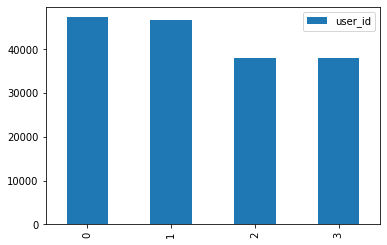

In [ ]:
df3_1[['log_month','user_id','gender']].groupby(['log_month','gender'],as_index=False).count().plot(kind='bar')